In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
dataset = pd.DataFrame(iris.data,columns=iris.feature_names)
dataset.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


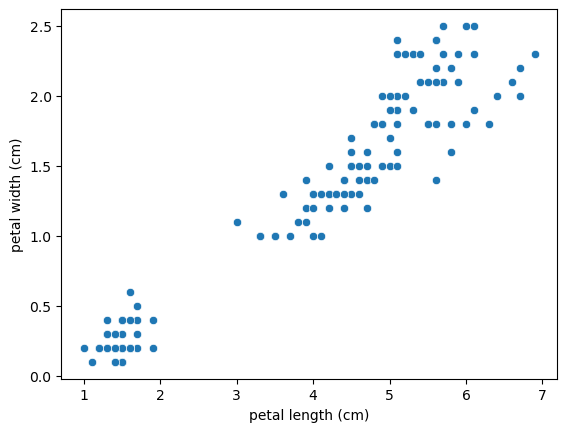

In [3]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=dataset)
plt.show()

In [4]:
sse = []
k_rng = range(1,9)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)

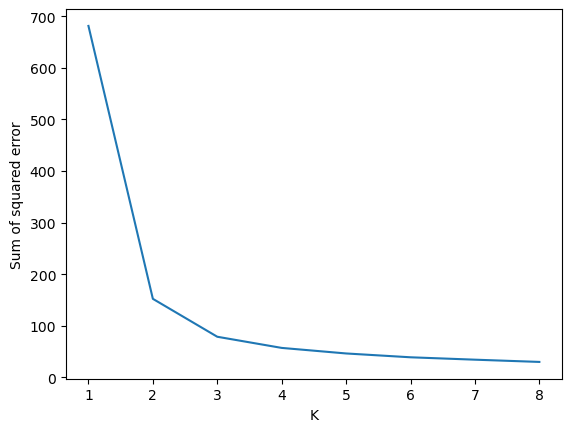

In [5]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [6]:
#En la grafica se divide en 3 grupos ya que tiende a establecerse en este punto un equilibrio en los datos
# esto podria indicar que hay tres especies o clases de petalos
dataset.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1,inplace=True)
dataset.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [7]:
km = KMeans(n_clusters=3)
#Agrupacion de datos
yp = km.fit_predict(dataset)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [8]:
dataset['cluster'] = yp
dataset.cluster.unique()

array([1, 0, 2], dtype=int32)

In [9]:
#Creamos tres grupos para verficar, lo que nos indica la metodologia del codo previamente visualizada
ds1 = dataset[dataset.cluster==0]
ds2 = dataset[dataset.cluster==1]
ds3 = dataset[dataset.cluster==2]

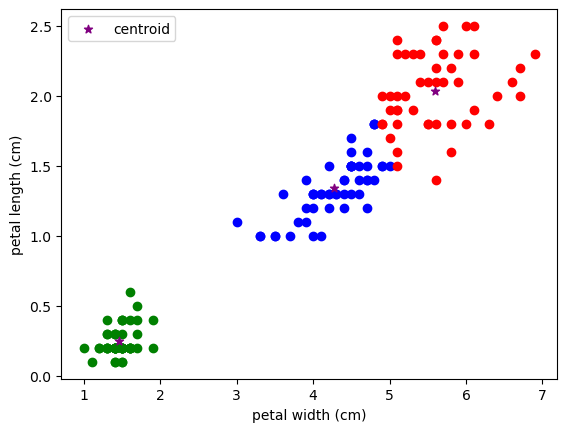

In [10]:
plt.ylabel('petal length (cm)')
plt.xlabel('petal width (cm)')
plt.scatter(ds1['petal length (cm)'],ds1['petal width (cm)'], color='blue')
plt.scatter(ds2['petal length (cm)'],ds2['petal width (cm)'], color='green')
plt.scatter(ds3['petal length (cm)'],ds3['petal width (cm)'], color='red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend()